<a href="https://colab.research.google.com/github/diandracharr/bike-sharing-rental-analysis/blob/main/Notebook_Project_Analysis_Bike_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset

---


- **Nama:** Diandra Charisa Yefiananda
- **Email:** diandra.charisa@student.ub.ac.id
- **ID Dicoding:** diandracharisa

## Latar Belakang Project

---



Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


## Data Set

---



Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

## Menentukan Pertanyaan Bisnis

---



1.   Apakah kondisi cuaca mempengaruhi jumlah peminjaman sepeda?
2.   Bagaimana perkembangan penggunaan sepeda dalam satu tahun, apakah tahun 2011 atau 2012 yang menonjol lebih baik?


## Import Semua Packages/Library yang Digunakan

---



Sebelum mengerjakan project, pastikan telah mengimport semua library yang dibutuhkan.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import datetime
import calendar

## Data Wrangling

---



### Gathering Data

Mengumpulkan data yang akan dipakai. Karena disini saya memakai Bike Sharing Dataset, maka saya mengimpor file day.csv dan hour.csv.

### Load tabel day

In [33]:
day_df = pd.read_csv("https://raw.githubusercontent.com/diandracharr/bike-sharing-rental-analysis/main/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load tabel hour

In [34]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/diandracharr/bike-sharing-rental-analysis/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Dataset Dictionary

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

---



Untuk menghindari kesalahan dalam data, kita perlu melakukan pengecekan yang maliputi:


*   Data type
*   Missing values
*   Duplicate data
* Statistical Outline



#### **Menilai Data day_df**

In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



*   Terdapat satu tipe data berdasarkan kolomnya yang tidak sesuai yaitu tipe data dteday yang awalnya object harus diganti menjadi tipe data datetime.
*   Variabel tahun 2011 direpresentasikan sebagai 0 dan tahun 2012 sebagai 1. Sehingga akan diubah kedalam bentuk nilai.

#### **Memeriksa Missing Values**

In [36]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat bahwa tabel day_df tidak memiliki missing values di dataset.

#### **Memeriksa Duplicate Data**

In [37]:
print("Jumlah duplikasi data:", day_df.duplicated().sum())

Jumlah duplikasi data: 0


Dapat dilihat bahwa tidak terdapat duplikasi data pada tabel day_df. Artinya semua data bersifat unique.

#### **Memeriksa Statistical Outline**

In [38]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Pada tabel day diatas tidak terdapat keanehan pada nilai statistiknya.

### **Menilai Data hour_df**

In [39]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   Terdapat satu tipe data berdasarkan kolomnya yang tidak sesuai yaitu tipe data dteday yang awalnya object harus diganti menjadi tipe data datetime.

#### **Memeriksa Missing Values**

In [40]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat bahwa tabel hour_df tidak memiliki missing values di dataset.

#### **Memeriksa Duplicate Data**

In [41]:
print("Jumlah duplikasi data:", hour_df.duplicated().sum())

Jumlah duplikasi data: 0


Dapat dilihat bahwa tidak terdapat duplikasi data pada tabel hour_df. Artinya semua data bersifat unique.

#### **Memeriksa Statistical Outline**

In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Pada tabel hour diatas tidak terdapat keanehan pada nilai statistiknya.

### Cleaning Data

---



Melakukan pembersihan data berdasarkan analisis penilaian data

#### **Menghapus tabel yang tidak diperlukan**

In [43]:
#tabel hour dan day hanya berbeda di kolom hour nya saja jadi akan dihapus
del hour_df

#### **Mengubah nama beberapa kolom**

In [44]:
#mengubah nama judul kolom agar lebih mudah dimengerti
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weathercond',
    'cnt': 'count'
}, inplace=True)

In [45]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Mengubah tipe data date day**

In [46]:
# mengubah tipe data dteday menjadi tipe data date
day_df['dateday'] = pd.to_datetime(day_df.dateday)

In [47]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dateday      731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathercond  731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: datet

#### **Mengubah nilai dari variabel season, weekday, month, season, dan weathercond**

In [48]:
#mengubah angka menjadi nama hari
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [49]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [50]:
#mengubah angka menjadi nama bulan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [51]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [52]:
#mengubah angka menjadi jenis musim
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [53]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
#mengubah angka menjadi jenis cuaca
day_df['weathercond'] = day_df['weathercond'].map({
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light snow/Rain',
    4: 'Heavy rain/Thunderstorm'
})

In [55]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Mengubah nilai dari variabel year**

In [56]:
day_df['year'] = day_df['dateday'].dt.year

In [57]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Menyimpan data yang telah dibersihkan**

In [58]:
day_df.to_csv("cleaned_bike_share.csv", index=False)

## Exploratory Data Analysis (EDA)

---



###**Weatherly Data**

1. Melihat jumlah baris dan kolom kondisi cuaca

In [59]:
day_data = day_df[['weathercond', 'casual', 'registered', 'count']]
day_data

,weathercond,casual,registered,count
0,Mist/Cloudy,331,654,985
1,Mist/Cloudy,131,670,801
2,Clear/Few clouds,120,1229,1349
3,Clear/Few clouds,108,1454,1562
4,Clear/Few clouds,82,1518,1600
...,...,...,...,...
726,Mist/Cloudy,247,1867,2114
727,Mist/Cloudy,644,2451,3095
728,Mist/Cloudy,159,1182,1341
729,Clear/Few clouds,364,1432,1796


2. Mengelompokkan data berdasarkan weather condition

In [72]:
weather_sum = day_data.groupby('weathercond').sum().reset_index()

In [73]:
weather_sum

,weathercond,casual,registered,count
0,Clear/Few clouds,446346,1811606,2257952
1,Light snow/Rain,3895,33974,37869
2,Mist/Cloudy,169776,827082,996858


**Menampilkan jumlah dari peminjam casual, registered, dan total peminjam berdasarkan cuaca**

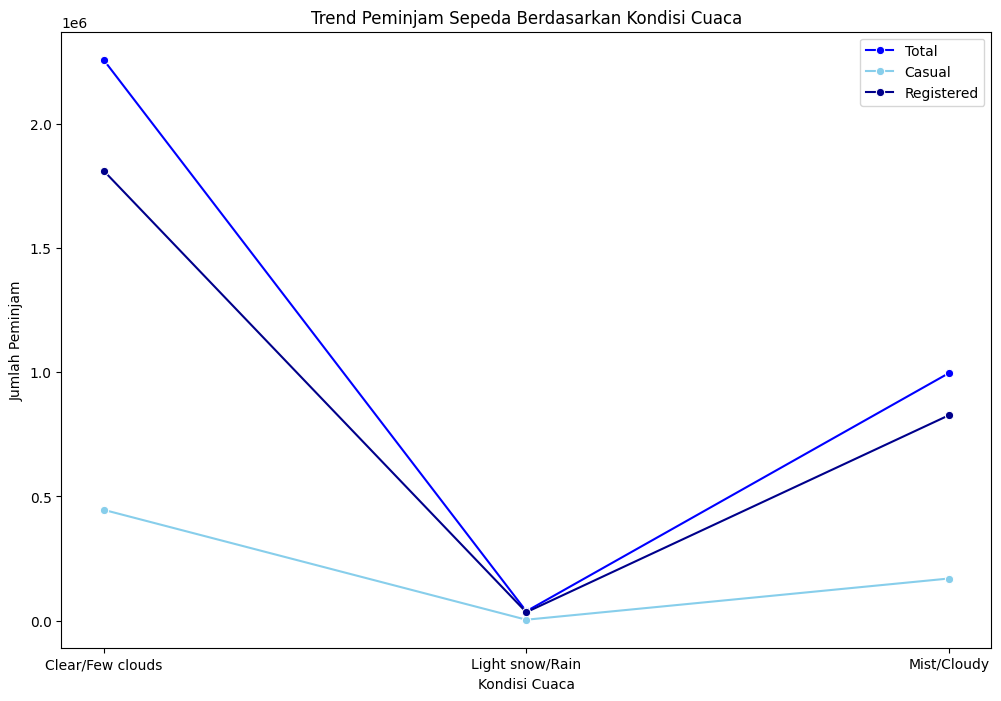

In [78]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='weathercond', y='count', data=weather_sum, marker='o', label='Total', color='blue')
sns.lineplot(x='weathercond', y='casual', data=weather_sum, marker='o', label='Casual', color='skyblue')
sns.lineplot(x='weathercond', y='registered', data=weather_sum, marker='o', label='Registered', color='darkblue')

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjam')
plt.title('Trend Peminjam Sepeda Berdasarkan Kondisi Cuaca')
plt.legend()

plt.show()

Berdasarkan hasil diatas membuat line diagram untuk mengetahui perubahan grafik jumlah pengguna casual, registered, dan keduanya. Peminjam cenderung meminjam ketika cuaca sedang cerah atau berawan.

###**Yearly Data**

1. Melihat jumlah baris dan kolom year

In [82]:
yearly_data = day_df[['year','count']]
yearly_data

,year,count
0,2011,985
1,2011,801
2,2011,1349
3,2011,1562
4,2011,1600
...,...,...
726,2012,2114
727,2012,3095
728,2012,1341
729,2012,1796


2. Mengambil kolom year dan count dari data frame

In [83]:
yearly_trends = yearly_data.groupby('year').sum()
yearly_trends

,count
year,
2011,1243103
2012,2049576


3. Menjumlah seluruh total peminjam

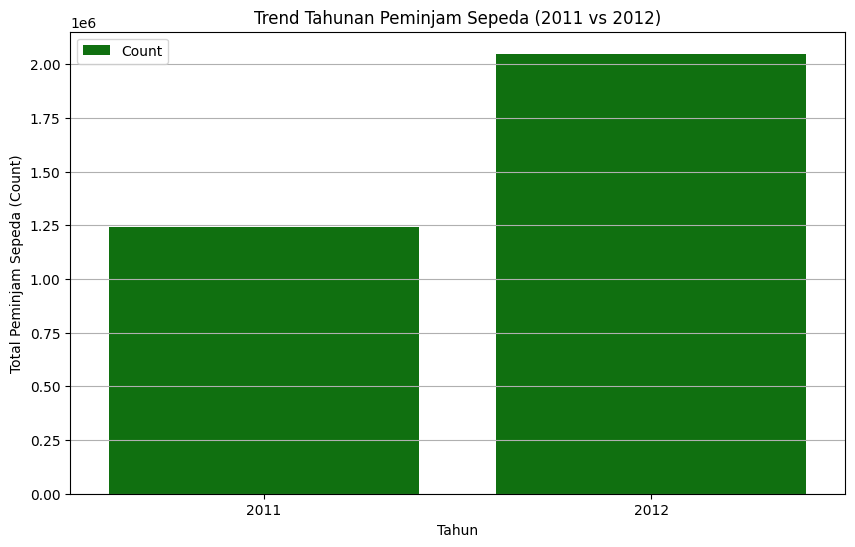

In [92]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x='year',
    y='count',
    data=yearly_trends,
    label='Count',
    color='green')

plt.title('Trend Tahunan Peminjam Sepeda (2011 vs 2012)')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjam Sepeda (Count)')
plt.grid(axis='y')
plt.legend()
plt.show()

Berdasarkan hasil diatas membuat bar diagram untuk mengetahui perubahan grafik jumlah peminjaman dari tahun ke tahun yang meningkat.

## Visualization & Explanatory Analysis

---



### **Pertanyaan 1: Apakah kondisi cuaca mempengaruhi jumlah peminjaman sepeda?**

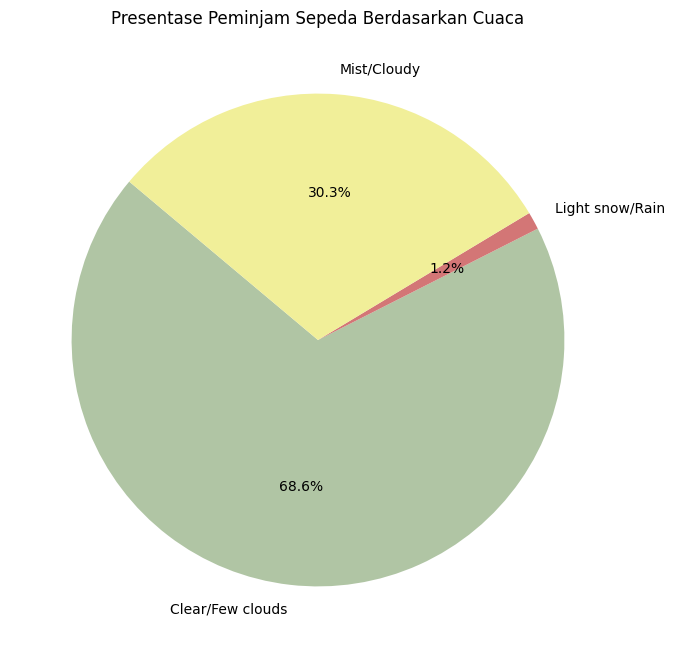

In [95]:
weather_sum.index = ['Clear/Few clouds', 'Light snow/Rain', 'Mist/Cloudy']
total_rentals = weather_sum['count'].sum()
proportions = weather_sum['count'] / total_rentals
colors = ('#B0C5A4', '#D37676', '#F1EF99')
explode = (0.1, 0, 0, 0)


plt.figure(figsize=(8, 8))
plt.pie(
    proportions,
    labels=weather_sum.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,

)
plt.title('Presentase Peminjam Sepeda Berdasarkan Cuaca')
plt.show()

Berdasarkan visualisasi data diatas menggunakan pie chart, dapat dinyatakan bahwa benar terdapat hubungan antara kondisi cuaca dan peminjam sepeda.
*   Saat cuaca cerah atau berawan paling diminati peminjam
*   Saat cuaca berkabut atau mendung berada di posisi kedua yang diminati peminjam
*   Saat cuaca bersalju atau hujan berada di posisi terakhir yang diminati peminjam

### **Pertanyaan 2: Bagaimana perkembangan penggunaan sepeda dalam satu tahun, apakah tahun 2011 atau 2012 yang menonjol lebih baik?**

In [98]:
yearly_trends['growth_percentage'] = yearly_trends['count'].pct_change() * 100

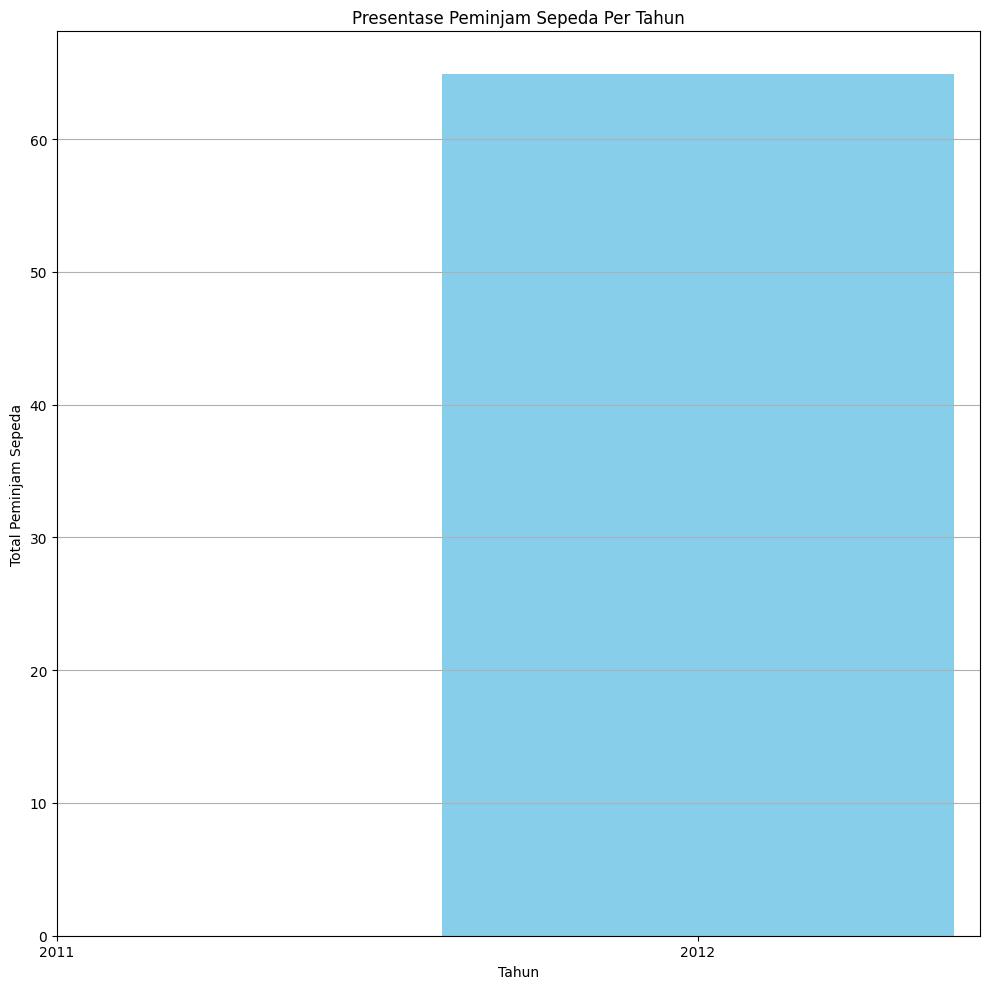

In [100]:
plt.figure(figsize=(10, 10))
plt.bar(yearly_trends.index, yearly_trends['growth_percentage'], color='skyblue')
plt.title('Presentase Peminjam Sepeda Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjam Sepeda')
plt.grid(axis='y')
plt.xticks(yearly_trends.index)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas menggunakan grafik bar, dapat dinyatakan bahwa peminjaman tahun 2012 lebih unggul daripada peminjaman tahun 2011. Dengan jumlah presentase lebih dari 60 persen.

## Conclusion

---



- Berdasarkan diagram diatas dapat disimpulkan hubungan antara keduanya jelas diamati. Peminjam sepeda tampaknya memiliki preferensi tertentu terhadap kondisi cuaca terutama menyukai cuaca yang cerah atau sedikit mendung dengan puncaknya yang mencapai presentase 68.6%. Di tempat kedua, cuaca berkabut atau mendung menjadi favorit dengan presetase peminjaman mencapai 30.3%. Sebaliknya, cuaca dengan sedikit salju atau hujan kurang diminati, ditandai dengan presentase peminjam sebanyak 1.2%. Pentingnya variabel cuaca dalam menentukan tingkat penyewaan sepeda menandakan perlunya strategi yang responsif terhadap prakiraan cuaca. Perusahaan penyewaan sepeda dapat memanfaatkan informasi cuaca untuk menyesuaikan strategi pemasaran, atau menyediakan layanan tambahan untuk meningkatkan daya tarik penyewaan sepeda pada kondisi cuaca yang bermacam-macam.
- Berdasarkan diagram di atas dapat disimpulkan antara tahun 2011 hingga 2012 (selama 1 tahun), terjadi peningkatan jumlah peminjam sepeda. Peminjam tersebut sudah termasuk kategori peminjam casual dan registered. Oleh karena itu, dari ilustrasi tersebut didapatkan informasi bahwa terjadi kenaikan lebih dari 60% peminjaman sepeda dalam kurun satu tahun. Dengan peningkatan ini mencerminkan adanya trend positif dalam pertumbuhan bisnis peminjaman sepeda.